In [22]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import game
from State import State

In [2]:
pd.options.display.max_columns = None
random.seed(10)
g = game.Game(quiet=True)

In [3]:
def act_and_append(iters=500000):
    g = game.Game(quiet=True)
    X = [list(State(g).state)]
    y = [0]
    for _ in range(iters):
        action = random.randrange(16)
        init_points = g.points
        if ((len(g.dice) > 0) & (len([i for i in g.board if i.isnumeric()]) > 0)) | (g.jokers > 0):
            if g.board[action].isnumeric():
                next_die = g.dice[0]
                g.place_die(next_die,action+1)
                g.lock_n_roll()
            elif (g.jokers > 0) & (action not in g.joker_on_board):
                g.place_joker(action+1)
                g.lock_n_roll()
            elif len([i for i in g.board if i.isnumeric()]) > 0:
                next_die = g.dice[0]
                adjusted_pos = min([int(i) for i in g.board if i.isnumeric()],key = lambda x: abs(x-action))
                g.place_die(next_die,adjusted_pos)
                g.lock_n_roll()
            else:
                adjusted_pos = min([int(i) for i,v in enumerate(g.board) if i not in g.joker_on_board],key = lambda x: abs(x-action))
                g.place_joker(adjusted_pos+1)
                g.lock_n_roll()
        y.append(g.points - init_points)
        X.append(list(State(g).state))
        if g.gameover:
            g = game.Game(quiet=True)
            y.append(0)
            X.append(list(State(g).state))
        
    return np.array(X),np.array(y)

def normalize(data):
    df = data.copy()
    continuous = [c for c in df if len(df[c].unique()) > 2]
    for c in continuous: df[c] = (df[c] - df[c].mean()) / df[c].std()
    return df

In [4]:
X,y = act_and_append()

In [5]:
data = pd.DataFrame(columns=State(g).labels,data=X)

In [6]:
data.head()

,JokerAv,Die0_B,Die0_G,Die0_R,Die0_Y,Die0_1,Die0_2,Die0_3,Die0_4,Die1_B,Die1_G,Die1_R,Die1_Y,Die1_1,Die1_2,Die1_3,Die1_4,Die2_B,Die2_G,Die2_R,Die2_Y,Die2_1,Die2_2,Die2_3,Die2_4,Die3_B,Die3_G,Die3_R,Die3_Y,Die3_1,Die3_2,Die3_3,Die3_4,Space0_CoveredByC_R,Space0_CoveredByC_B,Space0_CoveredByC_G,Space0_CoveredByC_Y,Space0_CoveredByN_1,Space0_CoveredByN_2,Space0_CoveredByN_3,Space0_CoveredByN_4,Space0_CoveredByJO,Move_0_Dist,Space1_CoveredByC_R,Space1_CoveredByC_B,Space1_CoveredByC_G,Space1_CoveredByC_Y,Space1_CoveredByN_1,Space1_CoveredByN_2,Space1_CoveredByN_3,Space1_CoveredByN_4,Space1_CoveredByJO,Move_1_Dist,Space2_CoveredByC_R,Space2_CoveredByC_B,Space2_CoveredByC_G,Space2_CoveredByC_Y,Space2_CoveredByN_1,Space2_CoveredByN_2,Space2_CoveredByN_3,Space2_CoveredByN_4,Space2_CoveredByJO,Move_2_Dist,Space3_CoveredByC_R,Space3_CoveredByC_B,Space3_CoveredByC_G,Space3_CoveredByC_Y,Space3_CoveredByN_1,Space3_CoveredByN_2,Space3_CoveredByN_3,Space3_CoveredByN_4,Space3_CoveredByJO,Move_3_Dist,Space4_CoveredByC_R,Space4_CoveredByC_B,Space4_CoveredByC_G,Space4_CoveredByC_Y,Space4_CoveredByN_1,Space4_CoveredByN_2,Space4_CoveredByN_3,Space4_CoveredByN_4,Space4_CoveredByJO,Move_4_Dist,Space5_CoveredByC_R,Space5_CoveredByC_B,Space5_CoveredByC_G,Space5_CoveredByC_Y,Space5_CoveredByN_1,Space5_CoveredByN_2,Space5_CoveredByN_3,Space5_CoveredByN_4,Space5_CoveredByJO,Move_5_Dist,Space6_CoveredByC_R,Space6_CoveredByC_B,Space6_CoveredByC_G,Space6_CoveredByC_Y,Space6_CoveredByN_1,Space6_CoveredByN_2,Space6_CoveredByN_3,Space6_CoveredByN_4,Space6_CoveredByJO,Move_6_Dist,Space7_CoveredByC_R,Space7_CoveredByC_B,Space7_CoveredByC_G,Space7_CoveredByC_Y,Space7_CoveredByN_1,Space7_CoveredByN_2,Space7_CoveredByN_3,Space7_CoveredByN_4,Space7_CoveredByJO,Move_7_Dist,Space8_CoveredByC_R,Space8_CoveredByC_B,Space8_CoveredByC_G,Space8_CoveredByC_Y,Space8_CoveredByN_1,Space8_CoveredByN_2,Space8_CoveredByN_3,Space8_CoveredByN_4,Space8_CoveredByJO,Move_8_Dist,Space9_CoveredByC_R,Space9_CoveredByC_B,Space9_CoveredByC_G,Space9_CoveredByC_Y,Space9_CoveredByN_1,Space9_CoveredByN_2,Space9_CoveredByN_3,Space9_CoveredByN_4,Space9_CoveredByJO,Move_9_Dist,Space10_CoveredByC_R,Space10_CoveredByC_B,Space10_CoveredByC_G,Space10_CoveredByC_Y,Space10_CoveredByN_1,Space10_CoveredByN_2,Space10_CoveredByN_3,Space10_CoveredByN_4,Space10_CoveredByJO,Move_10_Dist,Space11_CoveredByC_R,Space11_CoveredByC_B,Space11_CoveredByC_G,Space11_CoveredByC_Y,Space11_CoveredByN_1,Space11_CoveredByN_2,Space11_CoveredByN_3,Space11_CoveredByN_4,Space11_CoveredByJO,Move_11_Dist,Space12_CoveredByC_R,Space12_CoveredByC_B,Space12_CoveredByC_G,Space12_CoveredByC_Y,Space12_CoveredByN_1,Space12_CoveredByN_2,Space12_CoveredByN_3,Space12_CoveredByN_4,Space12_CoveredByJO,Move_12_Dist,Space13_CoveredByC_R,Space13_CoveredByC_B,Space13_CoveredByC_G,Space13_CoveredByC_Y,Space13_CoveredByN_1,Space13_CoveredByN_2,Space13_CoveredByN_3,Space13_CoveredByN_4,Space13_CoveredByJO,Move_13_Dist,Space14_CoveredByC_R,Space14_CoveredByC_B,Space14_CoveredByC_G,Space14_CoveredByC_Y,Space14_CoveredByN_1,Space14_CoveredByN_2,Space14_CoveredByN_3,Space14_CoveredByN_4,Space14_CoveredByJO,Move_14_Dist,Space15_CoveredByC_R,Space15_CoveredByC_B,Space15_CoveredByC_G,Space15_CoveredByC_Y,Space15_CoveredByN_1,Space15_CoveredByN_2,Space15_CoveredByN_3,Space15_CoveredByN_4,Space15_CoveredByJO,Move_15_Dist
0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
data.drop_duplicates().shape

(496813, 193)

In [8]:
data.describe()

,JokerAv,Die0_B,Die0_G,Die0_R,Die0_Y,Die0_1,Die0_2,Die0_3,Die0_4,Die1_B,Die1_G,Die1_R,Die1_Y,Die1_1,Die1_2,Die1_3,Die1_4,Die2_B,Die2_G,Die2_R,Die2_Y,Die2_1,Die2_2,Die2_3,Die2_4,Die3_B,Die3_G,Die3_R,Die3_Y,Die3_1,Die3_2,Die3_3,Die3_4,Space0_CoveredByC_R,Space0_CoveredByC_B,Space0_CoveredByC_G,Space0_CoveredByC_Y,Space0_CoveredByN_1,Space0_CoveredByN_2,Space0_CoveredByN_3,Space0_CoveredByN_4,Space0_CoveredByJO,Move_0_Dist,Space1_CoveredByC_R,Space1_CoveredByC_B,Space1_CoveredByC_G,Space1_CoveredByC_Y,Space1_CoveredByN_1,Space1_CoveredByN_2,Space1_CoveredByN_3,Space1_CoveredByN_4,Space1_CoveredByJO,Move_1_Dist,Space2_CoveredByC_R,Space2_CoveredByC_B,Space2_CoveredByC_G,Space2_CoveredByC_Y,Space2_CoveredByN_1,Space2_CoveredByN_2,Space2_CoveredByN_3,Space2_CoveredByN_4,Space2_CoveredByJO,Move_2_Dist,Space3_CoveredByC_R,Space3_CoveredByC_B,Space3_CoveredByC_G,Space3_CoveredByC_Y,Space3_CoveredByN_1,Space3_CoveredByN_2,Space3_CoveredByN_3,Space3_CoveredByN_4,Space3_CoveredByJO,Move_3_Dist,Space4_CoveredByC_R,Space4_CoveredByC_B,Space4_CoveredByC_G,Space4_CoveredByC_Y,Space4_CoveredByN_1,Space4_CoveredByN_2,Space4_CoveredByN_3,Space4_CoveredByN_4,Space4_CoveredByJO,Move_4_Dist,Space5_CoveredByC_R,Space5_CoveredByC_B,Space5_CoveredByC_G,Space5_CoveredByC_Y,Space5_CoveredByN_1,Space5_CoveredByN_2,Space5_CoveredByN_3,Space5_CoveredByN_4,Space5_CoveredByJO,Move_5_Dist,Space6_CoveredByC_R,Space6_CoveredByC_B,Space6_CoveredByC_G,Space6_CoveredByC_Y,Space6_CoveredByN_1,Space6_CoveredByN_2,Space6_CoveredByN_3,Space6_CoveredByN_4,Space6_CoveredByJO,Move_6_Dist,Space7_CoveredByC_R,Space7_CoveredByC_B,Space7_CoveredByC_G,Space7_CoveredByC_Y,Space7_CoveredByN_1,Space7_CoveredByN_2,Space7_CoveredByN_3,Space7_CoveredByN_4,Space7_CoveredByJO,Move_7_Dist,Space8_CoveredByC_R,Space8_CoveredByC_B,Space8_CoveredByC_G,Space8_CoveredByC_Y,Space8_CoveredByN_1,Space8_CoveredByN_2,Space8_CoveredByN_3,Space8_CoveredByN_4,Space8_CoveredByJO,Move_8_Dist,Space9_CoveredByC_R,Space9_CoveredByC_B,Space9_CoveredByC_G,Space9_CoveredByC_Y,Space9_CoveredByN_1,Space9_CoveredByN_2,Space9_CoveredByN_3,Space9_CoveredByN_4,Space9_CoveredByJO,Move_9_Dist,Space10_CoveredByC_R,Space10_CoveredByC_B,Space10_CoveredByC_G,Space10_CoveredByC_Y,Space10_CoveredByN_1,Space10_CoveredByN_2,Space10_CoveredByN_3,Space10_CoveredByN_4,Space10_CoveredByJO,Move_10_Dist,Space11_CoveredByC_R,Space11_CoveredByC_B,Space11_CoveredByC_G,Space11_CoveredByC_Y,Space11_CoveredByN_1,Space11_CoveredByN_2,Space11_CoveredByN_3,Space11_CoveredByN_4,Space11_CoveredByJO,Move_11_Dist,Space12_CoveredByC_R,Space12_CoveredByC_B,Space12_CoveredByC_G,Space12_CoveredByC_Y,Space12_CoveredByN_1,Space12_CoveredByN_2,Space12_CoveredByN_3,Space12_CoveredByN_4,Space12_CoveredByJO,Move_12_Dist,Space13_CoveredByC_R,Space13_CoveredByC_B,Space13_CoveredByC_G,Space13_CoveredByC_Y,Space13_CoveredByN_1,Space13_CoveredByN_2,Space13_CoveredByN_3,Space13_CoveredByN_4,Space13_CoveredByJO,Move_13_Dist,Space14_CoveredByC_R,Space14_CoveredByC_B,Space14_CoveredByC_G,Space14_CoveredByC_Y,Space14_CoveredByN_1,Space14_CoveredByN_2,Space14_CoveredByN_3,Space14_CoveredByN_4,Space14_CoveredByJO,Move_14_Dist,Space15_CoveredByC_R,Space15_CoveredByC_B,Space15_CoveredByC_G,Space15_CoveredByC_Y,Space15_CoveredByN_1,Space15_CoveredByN_2,Space15_CoveredByN_3,Space15_CoveredByN_4,Space15_CoveredByJO,Move_15_Dist
count,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.00000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,528460.000000,52

In [9]:
data_normed = normalize(data)
data_normed.head()

,JokerAv,Die0_B,Die0_G,Die0_R,Die0_Y,Die0_1,Die0_2,Die0_3,Die0_4,Die1_B,Die1_G,Die1_R,Die1_Y,Die1_1,Die1_2,Die1_3,Die1_4,Die2_B,Die2_G,Die2_R,Die2_Y,Die2_1,Die2_2,Die2_3,Die2_4,Die3_B,Die3_G,Die3_R,Die3_Y,Die3_1,Die3_2,Die3_3,Die3_4,Space0_CoveredByC_R,Space0_CoveredByC_B,Space0_CoveredByC_G,Space0_CoveredByC_Y,Space0_CoveredByN_1,Space0_CoveredByN_2,Space0_CoveredByN_3,Space0_CoveredByN_4,Space0_CoveredByJO,Move_0_Dist,Space1_CoveredByC_R,Space1_CoveredByC_B,Space1_CoveredByC_G,Space1_CoveredByC_Y,Space1_CoveredByN_1,Space1_CoveredByN_2,Space1_CoveredByN_3,Space1_CoveredByN_4,Space1_CoveredByJO,Move_1_Dist,Space2_CoveredByC_R,Space2_CoveredByC_B,Space2_CoveredByC_G,Space2_CoveredByC_Y,Space2_CoveredByN_1,Space2_CoveredByN_2,Space2_CoveredByN_3,Space2_CoveredByN_4,Space2_CoveredByJO,Move_2_Dist,Space3_CoveredByC_R,Space3_CoveredByC_B,Space3_CoveredByC_G,Space3_CoveredByC_Y,Space3_CoveredByN_1,Space3_CoveredByN_2,Space3_CoveredByN_3,Space3_CoveredByN_4,Space3_CoveredByJO,Move_3_Dist,Space4_CoveredByC_R,Space4_CoveredByC_B,Space4_CoveredByC_G,Space4_CoveredByC_Y,Space4_CoveredByN_1,Space4_CoveredByN_2,Space4_CoveredByN_3,Space4_CoveredByN_4,Space4_CoveredByJO,Move_4_Dist,Space5_CoveredByC_R,Space5_CoveredByC_B,Space5_CoveredByC_G,Space5_CoveredByC_Y,Space5_CoveredByN_1,Space5_CoveredByN_2,Space5_CoveredByN_3,Space5_CoveredByN_4,Space5_CoveredByJO,Move_5_Dist,Space6_CoveredByC_R,Space6_CoveredByC_B,Space6_CoveredByC_G,Space6_CoveredByC_Y,Space6_CoveredByN_1,Space6_CoveredByN_2,Space6_CoveredByN_3,Space6_CoveredByN_4,Space6_CoveredByJO,Move_6_Dist,Space7_CoveredByC_R,Space7_CoveredByC_B,Space7_CoveredByC_G,Space7_CoveredByC_Y,Space7_CoveredByN_1,Space7_CoveredByN_2,Space7_CoveredByN_3,Space7_CoveredByN_4,Space7_CoveredByJO,Move_7_Dist,Space8_CoveredByC_R,Space8_CoveredByC_B,Space8_CoveredByC_G,Space8_CoveredByC_Y,Space8_CoveredByN_1,Space8_CoveredByN_2,Space8_CoveredByN_3,Space8_CoveredByN_4,Space8_CoveredByJO,Move_8_Dist,Space9_CoveredByC_R,Space9_CoveredByC_B,Space9_CoveredByC_G,Space9_CoveredByC_Y,Space9_CoveredByN_1,Space9_CoveredByN_2,Space9_CoveredByN_3,Space9_CoveredByN_4,Space9_CoveredByJO,Move_9_Dist,Space10_CoveredByC_R,Space10_CoveredByC_B,Space10_CoveredByC_G,Space10_CoveredByC_Y,Space10_CoveredByN_1,Space10_CoveredByN_2,Space10_CoveredByN_3,Space10_CoveredByN_4,Space10_CoveredByJO,Move_10_Dist,Space11_CoveredByC_R,Space11_CoveredByC_B,Space11_CoveredByC_G,Space11_CoveredByC_Y,Space11_CoveredByN_1,Space11_CoveredByN_2,Space11_CoveredByN_3,Space11_CoveredByN_4,Space11_CoveredByJO,Move_11_Dist,Space12_CoveredByC_R,Space12_CoveredByC_B,Space12_CoveredByC_G,Space12_CoveredByC_Y,Space12_CoveredByN_1,Space12_CoveredByN_2,Space12_CoveredByN_3,Space12_CoveredByN_4,Space12_CoveredByJO,Move_12_Dist,Space13_CoveredByC_R,Space13_CoveredByC_B,Space13_CoveredByC_G,Space13_CoveredByC_Y,Space13_CoveredByN_1,Space13_CoveredByN_2,Space13_CoveredByN_3,Space13_CoveredByN_4,Space13_CoveredByJO,Move_13_Dist,Space14_CoveredByC_R,Space14_CoveredByC_B,Space14_CoveredByC_G,Space14_CoveredByC_Y,Space14_CoveredByN_1,Space14_CoveredByN_2,Space14_CoveredByN_3,Space14_CoveredByN_4,Space14_CoveredByJO,Move_14_Dist,Space15_CoveredByC_R,Space15_CoveredByC_B,Space15_CoveredByC_G,Space15_CoveredByC_Y,Space15_CoveredByN_1,Space15_CoveredByN_2,Space15_CoveredByN_3,Space15_CoveredByN_4,Space15_CoveredByJO,Move_15_Dist
0,-0.099359,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.575500,0,0,0,0,0,0,0,0,0,-0.595706,0,0,0,0,0,0,0,0,0,-0.466211,0,0,0,0,0,0,0,0,0,-0.384666,0,0,0,0,0,0,0,0,0,-0.317225,0,0,0,0,0,0,0,0,0,-0.248848,0,0,0,0,0,0,0,0,0,-0.18368,0,0,0,0,0,0,0,0,0,-0.115995,0,0,0,0,0,0,0,0,0,-0.056366,0,0,0,0,0,0,0,0,0,-0.016396,0,0,0,0,0,0,0,0,0,0.035218,0,0,0,0,0,0,0,0,0,0.101383,0,0,0,0,0,0,0,0,0,0.161444,0,0,0,0,0,0,0,0,0,0.231944,0,0,0,0,0,0,0,0,0,0.296834,0,0,0,0,0,0,0,0,0,0.370541
1,-0.099359,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.575500,0,1,0,0,0,0,0,1,0,-0.595706,0,

In [12]:
y.min()

0

In [13]:
y.max()

881

## PCA

In [14]:
pcs_names = [f'PC{i}' for i,v in enumerate(data.columns)]
pca = PCA(n_components=data.shape[1])
pca.fit(data_normed)
data_pca = pd.DataFrame(pca.transform(data_normed),columns = pcs_names)

In [15]:
data_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192
0,-0.771372,-1.364741,-0.220593,-1.254285,-0.317467,0.836781,0.077770,-0.882271,-0.159705,-0.295440,-0.254585,-0.797151,0.546791,0.246196,-0.060638,0.134615,0.546453,-0.264188,-0.526556,-0.423748,-0.055054,-0.074124,-0.138535,-0.036920,-0.016624,-0.030039,-0.030425,-0.021095,-0.093544,-0.004963,-0.043011,0.000125,-0.076945,0.007641,-0.022597,-0.021834,0.000949,-0.029453,0.026070,-0.016833,0.065323,0.008146,-0.018649,0.048165,-0.001007,-0.017903,0.085465,-0.025775,-0.041758,-0.053452,0.022924,-0.049801,0.041715,0.021378,-0.027262,0.213120,0.053357,0.014884,0.082932,-0.092856,0.120111,0.039888,0.068996,-0.033270,-0.093288,-0.152003,0.032492,0.039148,-0.053772,0.129931,-0.030203,0.044336,-0.057269,-0.099417,-0.226016,-0.122125,-0.142119,0.071387,0.028901,-0.081627,0.041153,0.068798,-0.201071,-0.062754,-0.054117,-0.028819,0.077877,0.064475,-0.001735,-0.034539,-0.034845,-0.072016,-0.026496,-0.025230,-0.019981,0.063523,0.020073,0.032177,0.031717,0.005046,-0.014590,-0.007441,-0.031939,0.010835,-0.047611,0.095486,0.136337,0.009001,0.056163,0.033272,-0.009412,-0.187459,-0.014844,0.181680,-0.337006,0.021206,-0.030563,-0.046589,-0.013607,-0.021161,0.043933,0.050341,0.057025,0.006760,-0.166684,0.391609,-0.539536,-0.504120,0.012183,0.056336,0.191122,0.082597,0.563435,-0.112576,0.055941,0.176129,0.123343,0.515160,0.278286,-0.060582,0.113734,-0.073943,0.086127,-0.182262,0.007561,-0.122448,-0.012860,0.121257,0.093368,-0.221983,-0.059598,-0.047466,-0.100566,0.152569,-0.000129,0.000762,-0.000142,-0.000209,0.001372,0.001023,-0.000179,0.000150,0.000227,0.000245,0.000152,-0.008108,0.001245,-0.000041,-0.000491,-0.000314,0.000347,-0.005578,8.552888e-14,-6.979291e-15,-6.454878e-15,1.349021e-15,1.294383e-16,5.380878e-15,1.772285e-16,7.084852e-17,-4.707898e-16,1.942011e-16,6.093051e-17,-4.133318e-16,-4.201941e-17,2.054963e-16,-8.563273e-17,-1.373039e-16,-2.289363e-16,2.371695e-16,3.792183e-16,5.140153e-17,-2.515702e-16
1,-0.808915,-1.345762,-0.205629,-0.956752,-0.170923,0.180130,-0.535460,0.265349,0.171967,-1.032818,-0.363094,-0.205622,0.310143,0.546826,-0.365581,0.103009,0.673055,-0.338837,-0.653658,-0.476336,-0.069722,0.431026,-0.038218,-0.010349,0.469569,-0.477656,-0.154216,0.120483,0.240204,0.069633,-0.233235,0.015142,-0.148050,0.031888,-0.075636,0.070485,-0.228718,-0.049434,0.134542,-0.196264,0.061670,-0.254308,-0.057284,-0.118751,-0.078883,0.185092,-0.098092,0.072235,-0.122116,-0.310423,0.172692,-0.062445,-0.141144,-0.067055,-0.153146,0.207151,0.086060,-0.211526,0.160114,0.028452,0.181496,0.027869,-0.052258,0.010406,-0.075429,-0.063044,0.165657,-0.014576,-0.015746,0.189329,0.000120,0.141344,-0.089265,-0.221637,-0.301526,0.002234,-0.161984,0.191610,0.088802,0.035140,0.157149,0.225905,-0.328472,-0.239988,-0.105647,0.152994,0.057886,0.241695,-0.095333,-0.023298,-0.105231,-0.203777,-0.126312,-0.083444,-0.033186,0.128599,0.016252,0.025144,0.021673,0.098006,0.019441,0.034106,-0.110717,0.003223,0.025177,0.130096,0.173830,0.0

Text(0.5, 0, 'Principal component')

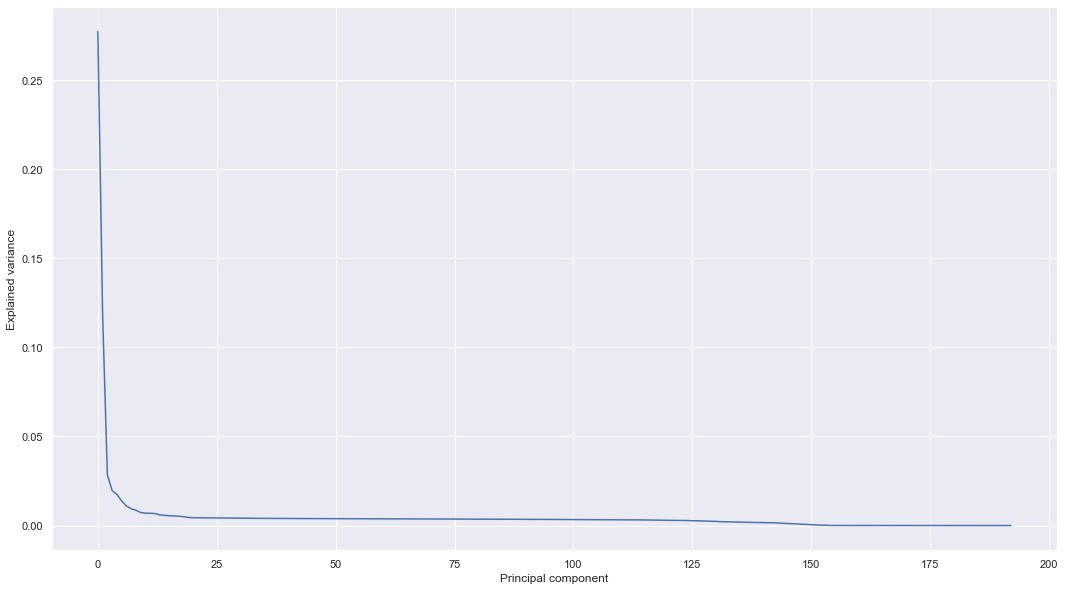

In [16]:
# create a scree plot
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(y = pca.explained_variance_ratio_, x = range(data_pca.shape[1]))
plt.ylabel('Explained variance')
plt.xlabel('Principal component')

In [17]:
for pc, var in zip(pcs_names,np.cumsum(pca.explained_variance_ratio_)):
    print(pc,var)

PC0 0.27741594914130213
PC1 0.3961573175985463
PC2 0.42469679143257866
PC3 0.4443490308746519
PC4 0.46181182003204113
PC5 0.47563947617989744
PC6 0.48664272214038956
PC7 0.4960742041642764
PC8 0.5046387818305256
PC9 0.5119593177975919
PC10 0.5189074860437362
PC11 0.5258058683283635
PC12 0.5325182576623734
PC13 0.5385183240603303
PC14 0.5442438378354489
PC15 0.5497237547360544
PC16 0.5551058608404215
PC17 0.5603858324596724
PC18 0.5653601434303029
PC19 0.5699293099704394
PC20 0.5743287484222214
PC21 0.5786810918124436
PC22 0.5830108678208397
PC23 0.5873140153005855
PC24 0.5916029164826919
PC25 0.5958812397727513
PC26 0.6001257910099032
PC27 0.604343413383124
PC28 0.6085523496536871
PC29 0.6127357123523863
PC30 0.6168639451206729
PC31 0.620952716070041
PC32 0.6250192077493383
PC33 0.6290686386990645
PC34 0.6331048997404173
PC35 0.6371360889457474
PC36 0.6411442769755454
PC37 0.6451376283684664
PC38 0.649118627414078
PC39 0.6530974670454006
PC40 0.6570660728016955
PC41 0.6610280317434744


In [18]:
selected_cols = 24
data_reduced = data_pca.iloc[:,0:selected_cols]

In [19]:
pca_transform = PCA(n_components=selected_cols)
pca_transform.fit(data_normed)

PCA(n_components=24)

In [20]:
with open('model/pca.pckl','wb') as f:
    pickle.dump(pca_transform,f)

## LDA

In [23]:
clf = LinearDiscriminantAnalysis(solver='svd',store_covariance=True)
clf.fit(X, y)

C:\Users\michaelkeith\Anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


LinearDiscriminantAnalysis(store_covariance=True)

Text(0.5, 0, 'component')

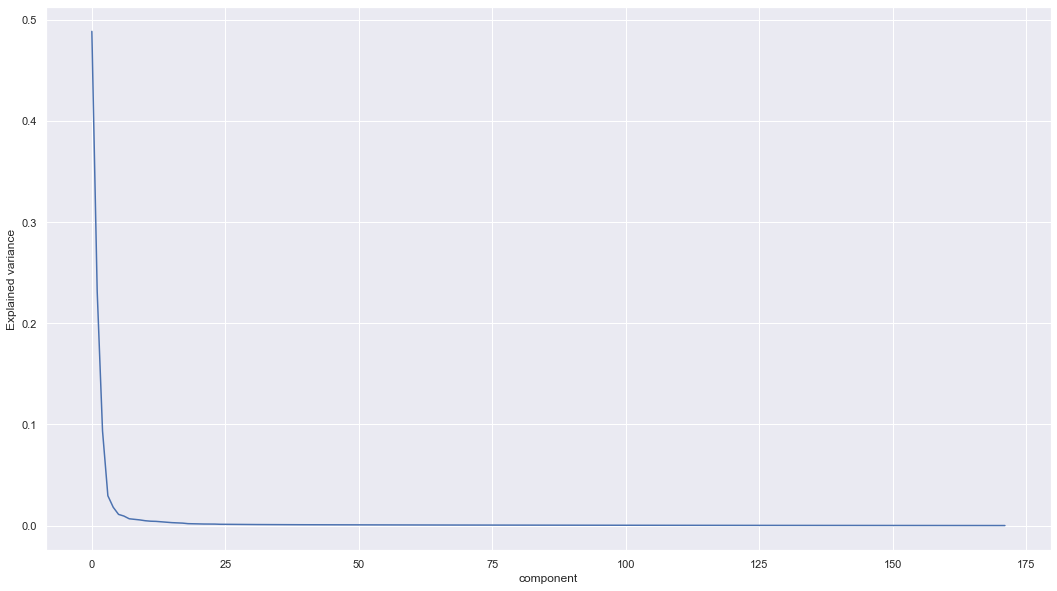

In [24]:
sns.lineplot(y = clf.explained_variance_ratio_, x = range(len(clf.explained_variance_ratio_)))
plt.ylabel('Explained variance')
plt.xlabel('component')

In [26]:
for i, var in enumerate(np.cumsum(clf.explained_variance_ratio_)):
    print(i,var)

0 0.4883911383042478
1 0.719710365949352
2 0.8132125095568296
3 0.8426889025767843
4 0.8608151712826195
5 0.8718749237525066
6 0.8813035093618748
7 0.8880325550235315
8 0.8942392409520212
9 0.8998324777057007
10 0.9046315244735231
11 0.9089666445522803
12 0.9131351279664829
13 0.9168943137476523
14 0.9202253546508278
15 0.9231305706460927
16 0.9258025379480432
17 0.9282419289408147
18 0.93014057251272
19 0.9318948018109853
20 0.9335865763931491
21 0.9351357698795447
22 0.9366513779236885
23 0.9381255022085739
24 0.9394170102836408
25 0.9406548858938302
26 0.9418211272942285
27 0.9429611765979772
28 0.9440723854283398
29 0.9451401570286735
30 0.9461821113591908
31 0.9471995198372585
32 0.9481842300934679
33 0.9491614282122036
34 0.9501282842087918
35 0.9510495384883667
36 0.9519686912423978
37 0.952858277132561
38 0.9537267538375097
39 0.954570755506432
40 0.9554105948031558
41 0.956236884899377
42 0.9570528810869885
43 0.9578502914731656
44 0.9586441650119246
45 0.9594271403463404
46 0

In [28]:
selected_comps = 13
lda_transform = LinearDiscriminantAnalysis(solver='svd',n_components=selected_comps)
lda_transform.fit(X,y)

LinearDiscriminantAnalysis(n_components=13)

In [29]:
with open('model/lda.pckl','wb') as f:
    pickle.dump(lda_transform,f)